# **1. MINIST Dataset**

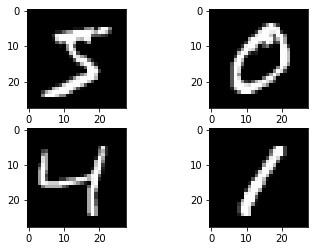

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
# show the plot
plt.show()

## 1.1. Baseline Model with Multilayer Perceptrons

In [2]:
# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import tensorflow as tf
# fix random seed for reproducibility
seed = 42
numpy.random.seed(42)
tf.random.set_seed(42)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer = 'normal' , activation= 'relu' ))
  model.add(Dense(num_classes, kernel_initializer = 'normal' , activation= 'softmax'))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

2021-11-13 11:29:07.234336: E tensorflow/stream_executor/rocm/rocm_driver.cc:983] could not retrieve ROCM device count: HIP_ERROR_NoDevice
2021-11-13 11:29:07.234504: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-13 11:29:07.235177: E tensorflow/stream_executor/rocm/rocm_driver.cc:983] could not retrieve ROCM device count: HIP_ERROR_NoDevice
2021-11-13 11:29:07.389578: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-13 11:29:07.413269: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:07.415500: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fu

Epoch 1/10


2021-11-13 11:29:07.557854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


300/300 - 1s - loss: 0.2774 - accuracy: 0.9216 - val_loss: 0.1363 - val_accuracy: 0.9597


2021-11-13 11:29:08.274016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:08.275992: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:08.277769: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:08.331920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 2/10
300/300 - 1s - loss: 0.1095 - accuracy: 0.9684 - val_loss: 0.0934 - val_accuracy: 0.9708


2021-11-13 11:29:09.066581: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:09.068566: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:09.070368: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 3/10
300/300 - 1s - loss: 0.0706 - accuracy: 0.9796 - val_loss: 0.0760 - val_accuracy: 0.9766


2021-11-13 11:29:09.804092: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:09.806064: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:09.807881: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 4/10
300/300 - 1s - loss: 0.0494 - accuracy: 0.9860 - val_loss: 0.0662 - val_accuracy: 0.9787


2021-11-13 11:29:10.536658: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:10.538622: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:10.540430: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 5/10
300/300 - 1s - loss: 0.0358 - accuracy: 0.9903 - val_loss: 0.0650 - val_accuracy: 0.9798


2021-11-13 11:29:11.278720: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:11.280736: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:11.282575: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 6/10
300/300 - 1s - loss: 0.0268 - accuracy: 0.9926 - val_loss: 0.0635 - val_accuracy: 0.9804


2021-11-13 11:29:12.007295: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:12.009361: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:12.011178: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 7/10
300/300 - 1s - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.0583 - val_accuracy: 0.9812


2021-11-13 11:29:12.750791: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:12.752794: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:12.754623: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 8/10
300/300 - 1s - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.0656 - val_accuracy: 0.9796


2021-11-13 11:29:13.485260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:13.487220: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:13.489047: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 9/10
300/300 - 1s - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.0611 - val_accuracy: 0.9814


2021-11-13 11:29:14.220306: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:14.222262: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:14.224074: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 10/10
300/300 - 1s - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0610 - val_accuracy: 0.9823


2021-11-13 11:29:14.953015: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:14.954978: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:14.956773: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:15.036772: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:15.039175: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:15.041026: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:15.082909: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Baseline Error: 1.77%


## 1.2. Simple Convolutional Neural Network for MNIST

In [7]:
# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')

# fix random seed for reproducibility
seed = 42
numpy.random.seed(42)
tf.random.set_seed(42)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.reshape(-1,28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


def baseline_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(32, 5, 5 , input_shape=(28, 28, 1), activation= 'relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

2021-11-13 11:30:40.539270: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:40.541431: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:40.543183: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:40.701550: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 1/100
300/300 - 1s - loss: 1.1444 - accuracy: 0.6337 - val_loss: 0.5900 - val_accuracy: 0.8279


2021-11-13 11:30:41.505109: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:41.506893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:41.508570: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:41.550908: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 2/100
300/300 - 1s - loss: 0.6411 - accuracy: 0.7972 - val_loss: 0.4390 - val_accuracy: 0.8687


2021-11-13 11:30:42.362220: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:42.365110: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:42.367814: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 3/100
300/300 - 1s - loss: 0.5402 - accuracy: 0.8299 - val_loss: 0.3762 - val_accuracy: 0.8871


2021-11-13 11:30:43.178037: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:43.180746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:43.182509: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 4/100
300/300 - 1s - loss: 0.4852 - accuracy: 0.8480 - val_loss: 0.3462 - val_accuracy: 0.8948


2021-11-13 11:30:43.994095: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:43.996967: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:43.999668: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 5/100
300/300 - 1s - loss: 0.4487 - accuracy: 0.8582 - val_loss: 0.3266 - val_accuracy: 0.8995


2021-11-13 11:30:44.810142: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:44.813045: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:44.815785: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 6/100
300/300 - 1s - loss: 0.4239 - accuracy: 0.8652 - val_loss: 0.2988 - val_accuracy: 0.9115


2021-11-13 11:30:45.628782: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:45.631660: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:45.633902: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 7/100
300/300 - 1s - loss: 0.3966 - accuracy: 0.8748 - val_loss: 0.2824 - val_accuracy: 0.9162


2021-11-13 11:30:46.444440: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:46.447387: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:46.449563: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 8/100
300/300 - 1s - loss: 0.3781 - accuracy: 0.8801 - val_loss: 0.2711 - val_accuracy: 0.9193


2021-11-13 11:30:47.247557: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:47.250475: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:47.252828: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 9/100
300/300 - 1s - loss: 0.3658 - accuracy: 0.8813 - val_loss: 0.2587 - val_accuracy: 0.9245


2021-11-13 11:30:48.054485: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:48.057126: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:48.058809: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 10/100
300/300 - 1s - loss: 0.3490 - accuracy: 0.8898 - val_loss: 0.2499 - val_accuracy: 0.9228


2021-11-13 11:30:48.862778: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:48.865126: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:48.866786: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 11/100
300/300 - 1s - loss: 0.3385 - accuracy: 0.8918 - val_loss: 0.2418 - val_accuracy: 0.9296


2021-11-13 11:30:49.671295: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:49.674186: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:49.676903: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 12/100
300/300 - 1s - loss: 0.3276 - accuracy: 0.8951 - val_loss: 0.2330 - val_accuracy: 0.9313


2021-11-13 11:30:50.485954: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:50.488745: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:50.490479: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 13/100
300/300 - 1s - loss: 0.3233 - accuracy: 0.8975 - val_loss: 0.2260 - val_accuracy: 0.9332


2021-11-13 11:30:51.293154: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:51.296035: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:51.298737: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 14/100
300/300 - 1s - loss: 0.3105 - accuracy: 0.9002 - val_loss: 0.2233 - val_accuracy: 0.9325


2021-11-13 11:30:52.109091: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:52.112000: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:52.113849: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 15/100
300/300 - 1s - loss: 0.3035 - accuracy: 0.9021 - val_loss: 0.2167 - val_accuracy: 0.9360


2021-11-13 11:30:52.931586: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:52.934017: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:52.935800: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 16/100
300/300 - 1s - loss: 0.2993 - accuracy: 0.9023 - val_loss: 0.2163 - val_accuracy: 0.9343


2021-11-13 11:30:53.754503: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:53.757148: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:53.758913: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 17/100
300/300 - 1s - loss: 0.2876 - accuracy: 0.9073 - val_loss: 0.2082 - val_accuracy: 0.9365


2021-11-13 11:30:54.560993: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:54.563956: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:54.566677: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 18/100
300/300 - 1s - loss: 0.2871 - accuracy: 0.9072 - val_loss: 0.2108 - val_accuracy: 0.9348


2021-11-13 11:30:55.374783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:55.377683: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:55.380414: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 19/100
300/300 - 1s - loss: 0.2779 - accuracy: 0.9098 - val_loss: 0.2040 - val_accuracy: 0.9362


2021-11-13 11:30:56.182954: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:56.185837: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:56.188454: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 20/100
300/300 - 1s - loss: 0.2747 - accuracy: 0.9119 - val_loss: 0.2039 - val_accuracy: 0.9372


2021-11-13 11:30:56.981442: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:56.984369: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:56.987066: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 21/100
300/300 - 1s - loss: 0.2719 - accuracy: 0.9125 - val_loss: 0.2019 - val_accuracy: 0.9376


2021-11-13 11:30:57.779240: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:57.782130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:57.784667: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 22/100
300/300 - 1s - loss: 0.2683 - accuracy: 0.9135 - val_loss: 0.2064 - val_accuracy: 0.9362


2021-11-13 11:30:58.587151: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:58.589661: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:58.591415: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 23/100
300/300 - 1s - loss: 0.2600 - accuracy: 0.9157 - val_loss: 0.1965 - val_accuracy: 0.9394


2021-11-13 11:30:59.394938: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:59.397840: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:30:59.400545: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 24/100
300/300 - 1s - loss: 0.2599 - accuracy: 0.9148 - val_loss: 0.1977 - val_accuracy: 0.9399


2021-11-13 11:31:00.194763: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:00.197431: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:00.199191: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 25/100
300/300 - 1s - loss: 0.2539 - accuracy: 0.9171 - val_loss: 0.1953 - val_accuracy: 0.9400


2021-11-13 11:31:01.002393: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:01.005318: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:01.008052: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 26/100
300/300 - 1s - loss: 0.2529 - accuracy: 0.9179 - val_loss: 0.1917 - val_accuracy: 0.9408


2021-11-13 11:31:01.814041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:01.816980: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:01.819709: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 27/100
300/300 - 1s - loss: 0.2451 - accuracy: 0.9201 - val_loss: 0.1880 - val_accuracy: 0.9412


2021-11-13 11:31:02.616535: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:02.619410: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:02.621586: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 28/100
300/300 - 1s - loss: 0.2458 - accuracy: 0.9195 - val_loss: 0.1864 - val_accuracy: 0.9428


2021-11-13 11:31:03.422414: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:03.425300: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:03.428031: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 29/100
300/300 - 1s - loss: 0.2430 - accuracy: 0.9201 - val_loss: 0.1914 - val_accuracy: 0.9388


2021-11-13 11:31:04.229406: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:04.232323: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:04.234135: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 30/100
300/300 - 1s - loss: 0.2406 - accuracy: 0.9207 - val_loss: 0.1849 - val_accuracy: 0.9425


2021-11-13 11:31:05.040932: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:05.043816: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:05.046538: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 31/100
300/300 - 1s - loss: 0.2405 - accuracy: 0.9205 - val_loss: 0.1811 - val_accuracy: 0.9437


2021-11-13 11:31:05.843919: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:05.846079: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:05.847813: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 32/100
300/300 - 1s - loss: 0.2348 - accuracy: 0.9228 - val_loss: 0.1828 - val_accuracy: 0.9424


2021-11-13 11:31:06.647175: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:06.650084: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:06.652652: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 33/100
300/300 - 1s - loss: 0.2329 - accuracy: 0.9228 - val_loss: 0.1814 - val_accuracy: 0.9432


2021-11-13 11:31:07.451713: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:07.454022: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:07.455784: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 34/100
300/300 - 1s - loss: 0.2308 - accuracy: 0.9244 - val_loss: 0.1808 - val_accuracy: 0.9430


2021-11-13 11:31:08.260186: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:08.263067: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:08.265330: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 35/100
300/300 - 1s - loss: 0.2282 - accuracy: 0.9255 - val_loss: 0.1788 - val_accuracy: 0.9439


2021-11-13 11:31:09.073698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:09.076614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:09.079344: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 36/100
300/300 - 1s - loss: 0.2262 - accuracy: 0.9247 - val_loss: 0.1785 - val_accuracy: 0.9444


2021-11-13 11:31:09.892476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:09.895360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:09.897539: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 37/100
300/300 - 1s - loss: 0.2246 - accuracy: 0.9263 - val_loss: 0.1769 - val_accuracy: 0.9437


2021-11-13 11:31:10.701112: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:10.704014: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:10.706791: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 38/100
300/300 - 1s - loss: 0.2214 - accuracy: 0.9269 - val_loss: 0.1814 - val_accuracy: 0.9441


2021-11-13 11:31:11.513204: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:11.516101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:11.518809: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 39/100
300/300 - 1s - loss: 0.2201 - accuracy: 0.9276 - val_loss: 0.1767 - val_accuracy: 0.9460


2021-11-13 11:31:12.316802: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:12.319695: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:12.321631: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 40/100
300/300 - 1s - loss: 0.2210 - accuracy: 0.9279 - val_loss: 0.1753 - val_accuracy: 0.9450


2021-11-13 11:31:13.130860: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:13.133403: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:13.135122: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 41/100
300/300 - 1s - loss: 0.2180 - accuracy: 0.9266 - val_loss: 0.1736 - val_accuracy: 0.9465


2021-11-13 11:31:13.935450: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:13.938359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:13.941084: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 42/100
300/300 - 1s - loss: 0.2118 - accuracy: 0.9299 - val_loss: 0.1765 - val_accuracy: 0.9459


2021-11-13 11:31:14.747541: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:14.750433: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:14.753148: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 43/100
300/300 - 1s - loss: 0.2155 - accuracy: 0.9296 - val_loss: 0.1747 - val_accuracy: 0.9462


2021-11-13 11:31:15.565468: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:15.568359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:15.571062: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 44/100
300/300 - 1s - loss: 0.2121 - accuracy: 0.9299 - val_loss: 0.1808 - val_accuracy: 0.9437


2021-11-13 11:31:16.378297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:16.381138: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:16.382881: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 45/100
300/300 - 1s - loss: 0.2116 - accuracy: 0.9296 - val_loss: 0.1725 - val_accuracy: 0.9459


2021-11-13 11:31:17.189106: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:17.191978: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:17.194678: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 46/100
300/300 - 1s - loss: 0.2092 - accuracy: 0.9309 - val_loss: 0.1768 - val_accuracy: 0.9456


2021-11-13 11:31:17.998264: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:18.001159: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:18.002916: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 47/100
300/300 - 1s - loss: 0.2120 - accuracy: 0.9294 - val_loss: 0.1760 - val_accuracy: 0.9453


2021-11-13 11:31:18.808757: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:18.810583: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:18.812271: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 48/100
300/300 - 1s - loss: 0.2057 - accuracy: 0.9314 - val_loss: 0.1763 - val_accuracy: 0.9459


2021-11-13 11:31:19.617451: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:19.620297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:19.622061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 49/100
300/300 - 1s - loss: 0.2104 - accuracy: 0.9295 - val_loss: 0.1729 - val_accuracy: 0.9471


2021-11-13 11:31:20.422878: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:20.425381: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:20.427057: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 50/100
300/300 - 1s - loss: 0.2080 - accuracy: 0.9309 - val_loss: 0.1725 - val_accuracy: 0.9462


2021-11-13 11:31:21.231765: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:21.233858: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:21.235605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 51/100
300/300 - 1s - loss: 0.2033 - accuracy: 0.9324 - val_loss: 0.1703 - val_accuracy: 0.9474


2021-11-13 11:31:22.037305: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:22.040209: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:22.042934: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 52/100
300/300 - 1s - loss: 0.2032 - accuracy: 0.9319 - val_loss: 0.1697 - val_accuracy: 0.9462


2021-11-13 11:31:22.836032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:22.838922: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:22.841166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 53/100
300/300 - 1s - loss: 0.2008 - accuracy: 0.9328 - val_loss: 0.1688 - val_accuracy: 0.9473


2021-11-13 11:31:23.643766: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:23.646060: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:23.647817: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 54/100
300/300 - 1s - loss: 0.2038 - accuracy: 0.9317 - val_loss: 0.1701 - val_accuracy: 0.9472


2021-11-13 11:31:24.450287: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:24.453166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:24.455870: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 55/100
300/300 - 1s - loss: 0.1993 - accuracy: 0.9338 - val_loss: 0.1734 - val_accuracy: 0.9481


2021-11-13 11:31:25.265451: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:25.268363: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:25.271131: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 56/100
300/300 - 1s - loss: 0.1985 - accuracy: 0.9334 - val_loss: 0.1716 - val_accuracy: 0.9471


2021-11-13 11:31:26.068211: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:26.070223: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:26.071981: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 57/100
300/300 - 1s - loss: 0.1991 - accuracy: 0.9341 - val_loss: 0.1710 - val_accuracy: 0.9474


2021-11-13 11:31:26.875854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:26.878164: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:26.879953: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 58/100
300/300 - 1s - loss: 0.1997 - accuracy: 0.9336 - val_loss: 0.1721 - val_accuracy: 0.9482


2021-11-13 11:31:27.674024: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:27.676918: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:27.679638: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 59/100
300/300 - 1s - loss: 0.1973 - accuracy: 0.9340 - val_loss: 0.1706 - val_accuracy: 0.9476


2021-11-13 11:31:28.472339: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:28.475216: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:28.477322: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 60/100
300/300 - 1s - loss: 0.1972 - accuracy: 0.9355 - val_loss: 0.1718 - val_accuracy: 0.9468


2021-11-13 11:31:29.279077: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:29.281638: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:29.283399: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 61/100
300/300 - 1s - loss: 0.1953 - accuracy: 0.9352 - val_loss: 0.1700 - val_accuracy: 0.9480


2021-11-13 11:31:30.088259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:30.090283: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:30.092156: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 62/100
300/300 - 1s - loss: 0.1929 - accuracy: 0.9355 - val_loss: 0.1713 - val_accuracy: 0.9479


2021-11-13 11:31:30.892071: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:30.895007: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:30.897747: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 63/100
300/300 - 1s - loss: 0.1929 - accuracy: 0.9358 - val_loss: 0.1657 - val_accuracy: 0.9500


2021-11-13 11:31:31.710272: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:31.713357: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:31.716302: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 64/100
300/300 - 1s - loss: 0.1910 - accuracy: 0.9373 - val_loss: 0.1677 - val_accuracy: 0.9476


2021-11-13 11:31:32.518603: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:32.521931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:32.524673: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 65/100
300/300 - 1s - loss: 0.1919 - accuracy: 0.9352 - val_loss: 0.1700 - val_accuracy: 0.9474


2021-11-13 11:31:33.328364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:33.331277: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:33.333488: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 66/100
300/300 - 1s - loss: 0.1916 - accuracy: 0.9361 - val_loss: 0.1749 - val_accuracy: 0.9483


2021-11-13 11:31:34.140612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:34.143583: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:34.146337: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 67/100
300/300 - 1s - loss: 0.1919 - accuracy: 0.9357 - val_loss: 0.1701 - val_accuracy: 0.9482


2021-11-13 11:31:34.949770: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:34.952660: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:34.955359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 68/100
300/300 - 1s - loss: 0.1895 - accuracy: 0.9358 - val_loss: 0.1690 - val_accuracy: 0.9478


2021-11-13 11:31:35.764271: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:35.767157: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:35.769876: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 69/100
300/300 - 1s - loss: 0.1901 - accuracy: 0.9362 - val_loss: 0.1709 - val_accuracy: 0.9478


2021-11-13 11:31:36.579501: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:36.582406: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:36.585010: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 70/100
300/300 - 1s - loss: 0.1894 - accuracy: 0.9361 - val_loss: 0.1652 - val_accuracy: 0.9478


2021-11-13 11:31:37.392791: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:37.395663: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:37.398389: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 71/100
300/300 - 1s - loss: 0.1897 - accuracy: 0.9358 - val_loss: 0.1705 - val_accuracy: 0.9483


2021-11-13 11:31:38.202968: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:38.205502: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:38.207192: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 72/100
300/300 - 1s - loss: 0.1892 - accuracy: 0.9365 - val_loss: 0.1701 - val_accuracy: 0.9479


2021-11-13 11:31:39.013746: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:39.016584: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:39.018310: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 73/100
300/300 - 1s - loss: 0.1851 - accuracy: 0.9388 - val_loss: 0.1678 - val_accuracy: 0.9484


2021-11-13 11:31:39.818880: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:39.821807: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:39.824559: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 74/100
300/300 - 1s - loss: 0.1830 - accuracy: 0.9387 - val_loss: 0.1690 - val_accuracy: 0.9479


2021-11-13 11:31:40.633883: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:40.636707: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:40.638416: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 75/100
300/300 - 1s - loss: 0.1841 - accuracy: 0.9394 - val_loss: 0.1706 - val_accuracy: 0.9485


2021-11-13 11:31:41.437758: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:41.440760: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:41.442571: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 76/100
300/300 - 1s - loss: 0.1839 - accuracy: 0.9383 - val_loss: 0.1690 - val_accuracy: 0.9489


2021-11-13 11:31:42.238343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:42.241249: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:42.243987: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 77/100
300/300 - 1s - loss: 0.1838 - accuracy: 0.9397 - val_loss: 0.1667 - val_accuracy: 0.9487


2021-11-13 11:31:43.035736: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:43.038209: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:43.039992: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 78/100
300/300 - 1s - loss: 0.1835 - accuracy: 0.9386 - val_loss: 0.1652 - val_accuracy: 0.9497


2021-11-13 11:31:43.846457: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:43.849343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:43.851636: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 79/100
300/300 - 1s - loss: 0.1825 - accuracy: 0.9388 - val_loss: 0.1669 - val_accuracy: 0.9495


2021-11-13 11:31:44.666660: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:44.669563: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:44.672273: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 80/100
300/300 - 1s - loss: 0.1800 - accuracy: 0.9395 - val_loss: 0.1673 - val_accuracy: 0.9481


2021-11-13 11:31:45.471936: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:45.474866: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:45.477356: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 81/100
300/300 - 1s - loss: 0.1829 - accuracy: 0.9385 - val_loss: 0.1689 - val_accuracy: 0.9476


2021-11-13 11:31:46.279992: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:46.282912: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:46.285812: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 82/100
300/300 - 1s - loss: 0.1812 - accuracy: 0.9393 - val_loss: 0.1677 - val_accuracy: 0.9485


2021-11-13 11:31:47.097950: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:47.100981: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:47.103766: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 83/100
300/300 - 1s - loss: 0.1782 - accuracy: 0.9406 - val_loss: 0.1655 - val_accuracy: 0.9501


2021-11-13 11:31:47.913982: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:47.917034: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:47.919920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 84/100
300/300 - 1s - loss: 0.1796 - accuracy: 0.9391 - val_loss: 0.1681 - val_accuracy: 0.9476


2021-11-13 11:31:48.734290: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:48.737296: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:48.740167: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 85/100
300/300 - 1s - loss: 0.1816 - accuracy: 0.9399 - val_loss: 0.1679 - val_accuracy: 0.9493


2021-11-13 11:31:49.552015: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:49.554959: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:49.557360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 86/100
300/300 - 1s - loss: 0.1784 - accuracy: 0.9398 - val_loss: 0.1689 - val_accuracy: 0.9476


2021-11-13 11:31:50.350536: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:50.353430: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:50.356154: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 87/100
300/300 - 1s - loss: 0.1795 - accuracy: 0.9395 - val_loss: 0.1653 - val_accuracy: 0.9487


2021-11-13 11:31:51.145410: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:51.148406: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:51.150284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 88/100
300/300 - 1s - loss: 0.1792 - accuracy: 0.9404 - val_loss: 0.1650 - val_accuracy: 0.9501


2021-11-13 11:31:51.949180: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:51.952196: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:51.953937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 89/100
300/300 - 1s - loss: 0.1784 - accuracy: 0.9390 - val_loss: 0.1651 - val_accuracy: 0.9489


2021-11-13 11:31:52.749818: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:52.752711: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:52.755421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 90/100
300/300 - 1s - loss: 0.1768 - accuracy: 0.9411 - val_loss: 0.1681 - val_accuracy: 0.9496


2021-11-13 11:31:53.562439: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:53.565327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:53.568053: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 91/100
300/300 - 1s - loss: 0.1765 - accuracy: 0.9409 - val_loss: 0.1697 - val_accuracy: 0.9472


2021-11-13 11:31:54.375607: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:54.378533: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:54.381142: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 92/100
300/300 - 1s - loss: 0.1779 - accuracy: 0.9396 - val_loss: 0.1687 - val_accuracy: 0.9480


2021-11-13 11:31:55.180772: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:55.183662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:55.185706: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 93/100
300/300 - 1s - loss: 0.1774 - accuracy: 0.9405 - val_loss: 0.1671 - val_accuracy: 0.9484


2021-11-13 11:31:55.993890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:55.996802: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:55.999604: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 94/100
300/300 - 1s - loss: 0.1767 - accuracy: 0.9403 - val_loss: 0.1660 - val_accuracy: 0.9497


2021-11-13 11:31:56.806770: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:56.809275: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:56.810989: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 95/100
300/300 - 1s - loss: 0.1735 - accuracy: 0.9426 - val_loss: 0.1664 - val_accuracy: 0.9500


2021-11-13 11:31:57.613819: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:57.616793: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:57.619558: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 96/100
300/300 - 1s - loss: 0.1719 - accuracy: 0.9422 - val_loss: 0.1670 - val_accuracy: 0.9507


2021-11-13 11:31:58.421492: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:58.424425: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:58.427233: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 97/100
300/300 - 1s - loss: 0.1758 - accuracy: 0.9409 - val_loss: 0.1677 - val_accuracy: 0.9484


2021-11-13 11:31:59.229680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:59.232923: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:31:59.234668: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 98/100
300/300 - 1s - loss: 0.1748 - accuracy: 0.9406 - val_loss: 0.1680 - val_accuracy: 0.9490


2021-11-13 11:32:00.035177: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:00.038089: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:00.040817: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 99/100
300/300 - 1s - loss: 0.1734 - accuracy: 0.9405 - val_loss: 0.1640 - val_accuracy: 0.9495


2021-11-13 11:32:00.840563: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:00.843568: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:00.845537: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 100/100
300/300 - 1s - loss: 0.1752 - accuracy: 0.9413 - val_loss: 0.1713 - val_accuracy: 0.9480


2021-11-13 11:32:01.645287: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:01.648268: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:01.650172: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:01.722749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:01.725251: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:01.727136: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:32:01.776476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


CNN Error: 5.20%


## 1.3. Larger

In [4]:
# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')

# fix random seed for reproducibility
seed = 42
numpy.random.seed(42)
tf.random.set_seed(42)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.reshape(-1,28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(25, 5, 5 , input_shape=(28, 28, 1), activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(64, 5, 5, activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation= 'relu' ))
  model.add(Dense(50, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_2/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 5, 5, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_2/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,25], [5,5,25,64].

In [8]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np
from keras import backend as K
K.set_image_data_format('channels_last')
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.reshape(-1,28,28,1)

convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


convolutional_neural_network.compile(optimizer='adam', validation_data=(X_test, y_test), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=10)


TypeError: Invalid keyword argument(s) in `compile()`: ({'validation_data'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [5]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np
from keras import backend as K
K.set_image_data_format('channels_last')
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.reshape(-1,28,28,1)

convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='softmax')
])


convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=10)


2021-11-13 11:29:56.753417: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:56.755463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:56.757162: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:56.942349: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2021-11-13 11:29:56.949783: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at sparse_xent_op.cc:113 : Invalid argument: Received a label value of 8 which is outside the valid range of [0, 1).  Label values: 3 2 6 8 2 8 2 8 2 6 0 4 3 0 6 6 5 5 0 8 8 0 8 0 1 4 6 4 4 0 3 2


Epoch 1/10


InvalidArgumentError:  Received a label value of 8 which is outside the valid range of [0, 1).  Label values: 3 2 6 8 2 8 2 8 2 6 0 4 3 0 6 6 5 5 0 8 8 0 8 0 1 4 6 4 4 0 3 2
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at tmp/ipykernel_11184/914745008.py:34) ]] [Op:__inference_train_function_18370]

Function call stack:
train_function


In [ ]:
convolutional_neural_network.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0452 - accuracy: 0.9895


[0.04519516974687576, 0.9894999861717224]